**We have been asked to use our hypothesis testing skills to answer the following questions:**

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



**For each question, make sure to:**

1. State your Null Hypothesis and Alternative Hypothesis

2. Select the correct test according to the data type and number of samples

3. Test the assumptions of your selected test.

4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

5. Interpret your p-value and reject or fail to reject your null hypothesis 

6. Show a supporting visualization that helps display the result


<font size="5">**Imports**<font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
ins = pd.read_csv('Data/insurance - insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Questions 1. Do smokers have higher insurance charges than non-smokers?**

Null Hypothesis: There is no difference in insurance charge between smokers and non-smokers.

Alternative Hypothesis: There is difference in insurance charge between smokers and non-smokers.

In [4]:
#Making two dataframe for "smoker" and for "non-smoker"
smoker_df = ins.loc[ins['smoker']=='yes',:].copy()
nonsmoker_df = ins.loc[ins['smoker']=='no',:].copy()
#Define our feature of interest
smoker_charges = smoker_df['charges']
nonsmoker_charges = nonsmoker_df['charges']

**Size of the two groups.**

In [5]:
print(f'Size of smoker {len(smoker_charges)}')
print(f'Size of non_smoker {len(nonsmoker_charges)}')

Size of smoker 274
Size of non_smoker 1064


**Testing Assumptions**

In [6]:
#Check for outliers in smoker_df
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

No outliers in Smoker

In [7]:
#Check for outliers in nonsmoker_df
zscores= stats.zscore(nonsmoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [8]:
#Looping out all the outliers
while np.sum(outliers) > 0 and len(outliers)> 0:
    nonsmoker_charges = nonsmoker_charges[(np.abs(stats.zscore(nonsmoker_charges)) < 3)]
    zscores= stats.zscore(nonsmoker_charges)
    outliers = abs(zscores)>3
    np.sum(outliers)

In [9]:
#Recheck for outliers in nonsmoker_df
zscores= stats.zscore(nonsmoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

**Normality**

In [10]:
#Test the smoker_charges group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

Smoker charges are not normally distributed. The samples sizes is large enough to not need to be normally distributed.

**Equal Variance**

In [11]:
#Test for equal variance
result = stats.levene(smoker_charges, nonsmoker_charges)
result

LeveneResult(statistic=791.4740947105306, pvalue=7.254211040409339e-136)

Variances is not equal. We'll have to put "equal_var = False" when performing our t-test.

**Perform and evaluate the t-test**

In [12]:
result = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False)
result

Ttest_indResult(statistic=34.76759075466699, pvalue=5.672680697343108e-106)

Our p-value < alpha (0.05). I reject the null hypothesis and accept that there is a significant difference between smoker and non-smoker insurance charges.

**Supporting Visualization**

Text(0.5, 1.0, 'Smoker Mean vs. Non-smoker Mean Charges')

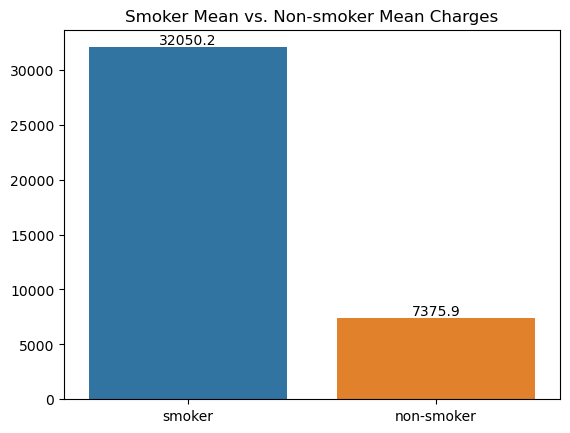

In [13]:
ax = sns.barplot(x=['smoker','non-smoker'], y=[smoker_charges.mean(),nonsmoker_charges.mean()])
ax.bar_label(ax.containers[0])
plt.title('Smoker Mean vs. Non-smoker Mean Charges')

**Question 2. Are men more likely to smoke than women?**

Null Hypothesis: There is no difference in the numbers of male smokers vs women smokers.

Alternative Hypothesis: There is difference in the numbers of male smokers vs women smokers.

In [14]:
#Calculate the contingency table with pd.cross-tab
table = pd.crosstab(ins['sex'], ins['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


**Chi-Square Test**

In [15]:
#The p_value
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result
# test the p-value?
print(p)
p<.05

0.006548143503580696


True

P-value < .05. I reject the null hypothesis and accept the alternate hypothesis that there is difference in the numbers of male smokers vs women smokers.

**Supporting Visualization**

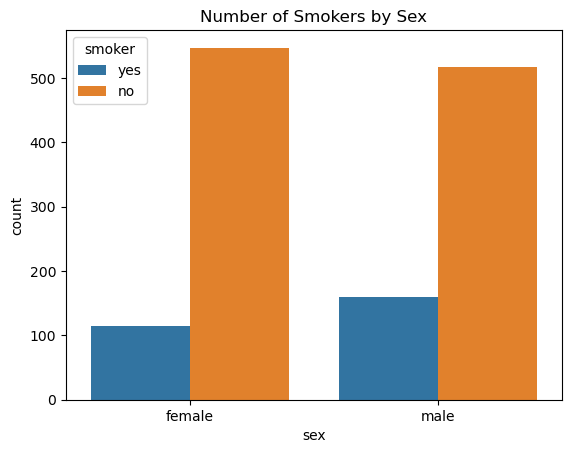

In [16]:
ax = sns.countplot(data=ins, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

**Question 3. Do different regions have different charges, on average?**

Null Hypothesis: That all regions average charges are the same.

Alternative Hypothesis: That there is a difference in regions average charges.

**Separating Groups**

In [17]:
##Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
##Loop through all unique categories
for i in ins['region'].unique():
    ## Get series for group and rename
    data = ins.loc[ins['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

**Checking Normality**

In [18]:
#Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [19]:
##Checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


There is no normality in any of the groups. The sample is large enough that it not needed.

**Equal Variance**

In [20]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

No equal variances in the four keys. Going to use a non-parametric equivalent of our test.

**Kruskal-Wallis**

In [21]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

The p-value > 0.05. I fail to reject the null hypothesis. All regions charges are similar, on average.

**Supporting Visualization**

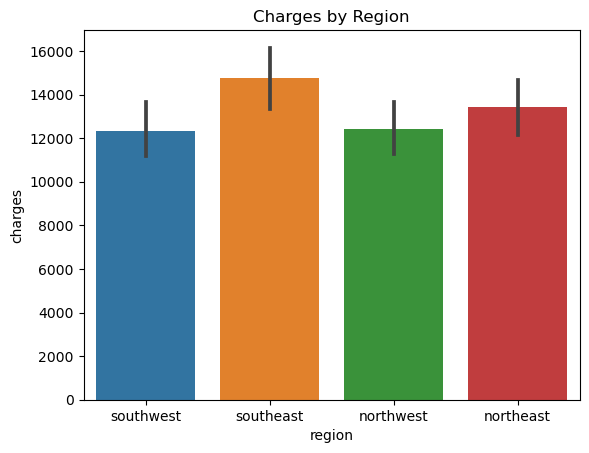

In [22]:
ax = sns.barplot(data=ins, x='region',y='charges')
ax.set_title("Charges by Region");